## Установка зависимостей и импорты

In [ ]:
!pip install -q ultralytics opencv-python pillow pycocotools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.0 MB/s eta 0:00:00


In [ ]:
import requests
import pandas as pd
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Загрузка модели и данных

In [ ]:
# Ссылка на выполнение тестового
public_url = "https://disk.yandex.ru/d/hcSklQ0lI6AKgA"

# Получаем прямую ссылку на скачивание через API
api_url = "https://cloud-api.yandex.net/v1/disk/public/resources/download"
params = {"public_key": public_url}
response = requests.get(api_url, params=params)

if response.status_code == 200:
    download_url = response.json()["href"]
    file_response = requests.get(download_url)

    with open("dataset_fire_smoke.zip", "wb") as f:
        f.write(file_response.content)
    print("Файл успешно скачан!")
else:
    print("Ошибка:", response.json())

# Распакуем ZIP-файлы
!unzip -o dataset_fire_smoke.zip
!unzip -o images_new.zip -d images
!unzip -o labels.zip -d labels
!unzip -o annotations_new.zip -d annotations
!unzip -o train_of_model.zip -d train_of_model

Файл успешно скачан!
Archive:  dataset_fire_smoke.zip
  inflating: data.yaml               
  inflating: __MACOSX/._data.yaml    
  inflating: train_of_model.zip      
  inflating: __MACOSX/._train_of_model.zip  
  inflating: annotations_new.zip     
  inflating: __MACOSX/._annotations_new.zip  
  inflating: labels.zip              
  inflating: __MACOSX/._labels.zip   
  inflating: images_new.zip          
  inflating: __MACOSX/._images_new.zip  
Archive:  images_new.zip
   creating: images/train/
   creating: images/val/
  inflating: images/train.cache      
  inflating: images/val.cache        
  inflating: images/train/002007.jpg  
  inflating: images/train/sm_001156.jpg  
  inflating: images/train/images (3144).jpg  
  inflating: images/train/images (2756).jpg  
  inflating: images/train/sm_000347.jpg  
  inflating: images/train/002074.jpg  
  inflating: images/train/ffd2d7df-a1c9-4ada-8106-68a0757ca460.jpg  
  inflating: images/train/sm_000007.jpg  
  inflating: images/train/0001

## Результаты и визуализация

Валидация модели

In [ ]:
model = YOLO('train_of_model/weights/best.pt')
results = model.val(data="data.yaml")

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 112MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1998.3±477.5 MB/s, size: 135.3 KB)



val: Scanning /content/labels/val... 308 images, 1 backgrounds, 0 corrupt: 100%|██████████| 308/308 [00:00<00:00, 1931.19it/s]

val: New cache created: /content/labels/val.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.96it/s]


                   all        308        648      0.701      0.648      0.685       0.45
                 smoke        175        197      0.702       0.61      0.667      0.453
                  fire        303        451        0.7      0.685      0.703      0.447
Speed: 1.0ms preprocess, 4.1ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val


Скорость на валидации

In [ ]:
total_time_ms = 1 + 4.1 + 0.0 + 2.6
print(f"🕒 Общее время инференса GPU: {total_time_ms:.2f} ms")
print(f"FPS: {1000 / total_time_ms:.2f}")

🕒 Общее время инференса GPU: 7.70 ms
FPS: 129.87


Визуализация метрик

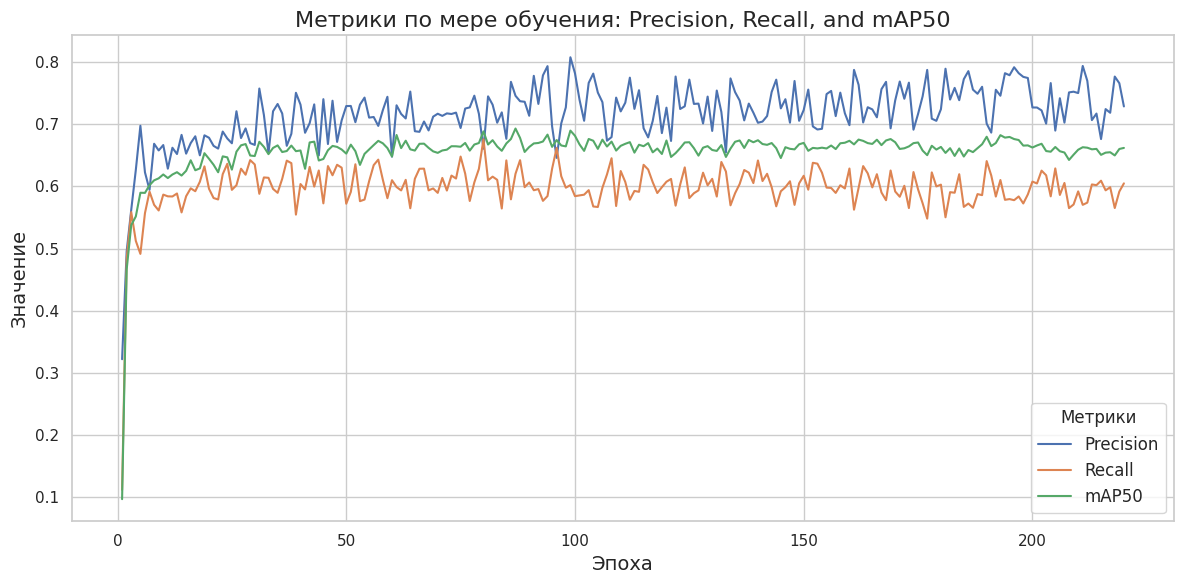

In [ ]:
learning_data = pd.read_csv('train_of_model/results.csv')
plot_data = pd.DataFrame({
    'Epoch': learning_data['epoch'],
    'Precision': learning_data['metrics/precision(B)'],
    'Recall': learning_data['metrics/recall(B)'],
    'mAP@50': learning_data['metrics/mAP50(B)']
})


# Визуализация
plot_data.set_index('Epoch', inplace=True)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_data, x='Epoch', y='Precision', label='Precision')
sns.lineplot(data=plot_data, x='Epoch', y='Recall', label='Recall')
sns.lineplot(data=plot_data, x='Epoch', y='mAP@50', label='mAP50')

plt.title("Метрики по мере обучения: Precision, Recall, and mAP50", fontsize=16)
plt.xlabel("Эпоха", fontsize=14)
plt.ylabel("Значение", fontsize=14)


plt.legend(title='Метрики', title_fontsize=12, fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

Предскажем для 3х картинок


image 1/1 /content/images/val/sm_001386.jpg: 384x640 1 smoke, 1 fire, 7.4ms
Speed: 2.4ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/images/val/images (989).jpg: 448x640 2 smokes, 1 fire, 6.8ms
Speed: 2.0ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/images/val/000231.jpg: 320x640 1 fire, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)


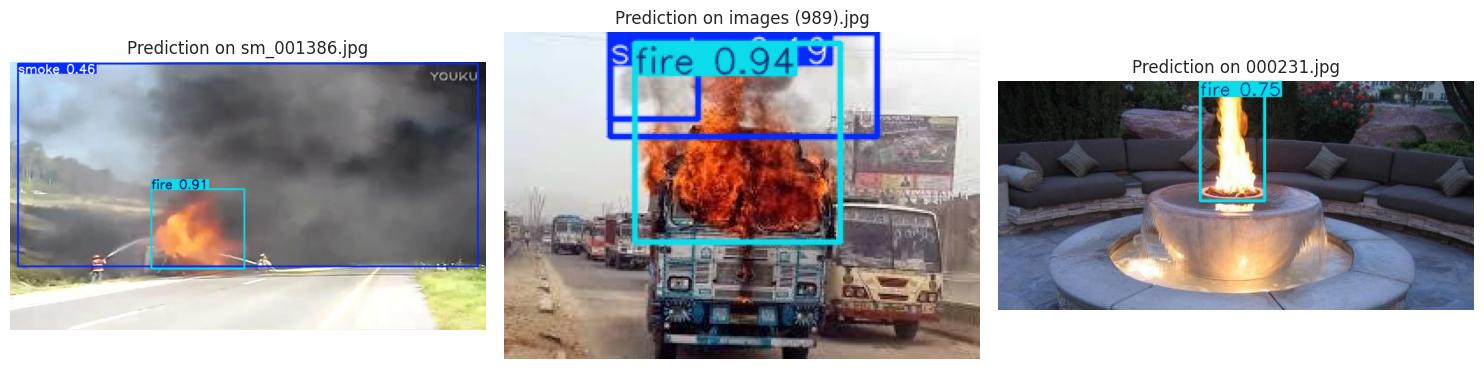

In [ ]:
# Путь к val изображениям
val_images_dir = "images/val/"

image_files = [f for f in os.listdir(val_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

random.seed(1333)
sample_images = random.sample(image_files, min(3, len(image_files)))

# Визуализируем результаты
plt.figure(figsize=(15, 5))

for i, img_file in enumerate(sample_images):
    image_path = os.path.join(val_images_dir, img_file)
    results = model.predict(source=image_path, conf=0.1)
    annotated_image = results[0].plot()

    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction on {img_file}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Спасибо за внимание!